In [1]:
# Test individual model performance and ensemble model performance
# Last updated: 5/18/2024 by NB 

In [2]:
# 0. Load objects

# Libraries
rm(list=ls())
library(ggplot2)
suppressMessages(library(dplyr))
library(forcats)

# Set wd
setwd('~/Desktop/GitHub/CES_prediction')

# Data
load('output/3_aucs/auc_assessment.rda')

# Functions
source('scripts/0_functions/00_create_directory.R')

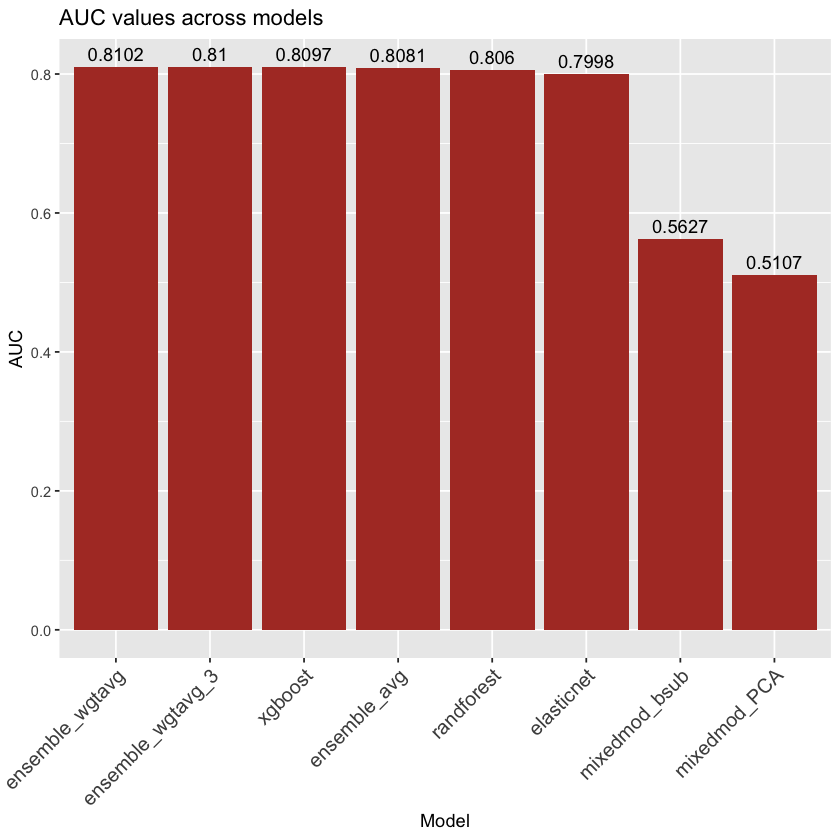

In [3]:
# 1. Plot

# Create df 
model_names <- c('xgboost', 'randforest', 'elasticnet', 'mixedmod_PCA', 'mixedmod_bsub', 'ensemble_avg', 
                 'ensemble_wgtavg', 'ensemble_wgtavg_3')
auc_values <- c(0.8097, 0.806, 0.7998, 0.5107, 0.5627, 0.8081, 0.8102, 0.81)
auc_df <- data.frame(model = model_names, auc = auc_values) %>%
  arrange(desc(auc)) %>%
  mutate(model = fct_reorder(model, auc, .desc=TRUE))

# Create a barplot 
ggplot(auc_df, aes(x = model, y = auc)) +
  geom_bar(stat = 'identity', fill = '#B03A2E') +
  geom_text(aes(label = round(auc, 4)), vjust = -0.5) +
  labs(title = 'AUC values across models',
       x = 'Model', y = 'AUC') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12))

From this analysis, I would select the ensemble model that is a weighted average of all 5 component models. In addition having the largest AUC, ensemble models are known to perform better than individual models. The discrepancy in performance between the more advanced models and the mixed models with variable selection should be investigated. 